In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:
boston = sklearn.datasets.load_boston()

In [4]:
boston.data.shape

(506, 13)

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.data.shape

(506, 13)

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston.target.shape

(506,)

# Inspection of the housing price

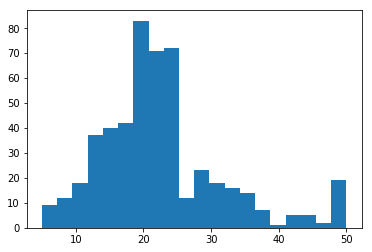

In [12]:
plt.hist(boston.target, bins=20);

#Crime Rate

In [14]:
feature_names = list(boston.feature_names)

In [17]:
crime_data = boston.data[:, feature_names.index('CRIM')]

In [18]:
crime_data.shape

(506,)

In [19]:
np.mean(crime_data), np.max(crime_data), np.min(crime_data)

(3.613523557312254, 88.9762, 0.00632)

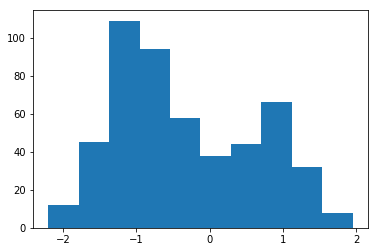

In [23]:
plt.hist(np.log10(crime_data));

In [25]:
crime_town_index = np.argsort(crime_data)


In [27]:
crime_town_index[:10], crime_data[crime_town_index[:10]]

(array([  0, 284, 285, 341,  55,  54, 195,  57, 194, 348]),
 array([0.00632, 0.00906, 0.01096, 0.01301, 0.01311, 0.0136 , 0.01381,
        0.01432, 0.01439, 0.01501]))

In [29]:
crime_town_index[-10:], crime_data[crime_town_index[-10:]] 

(array([417, 413, 427, 398, 404, 414, 410, 405, 418, 380]),
 array([25.9406, 28.6558, 37.6619, 38.3518, 41.5292, 45.7461, 51.1358,
        67.9208, 73.5341, 88.9762]))

# Lower status population %

In [31]:
lstat_data = boston.data[:, feature_names.index('LSTAT')]

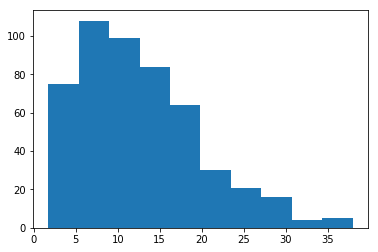

In [32]:
plt.hist(lstat_data);

# Pupil Teacher Ratio


In [33]:
pt_data = boston.data[:, feature_names.index('PTRATIO')]

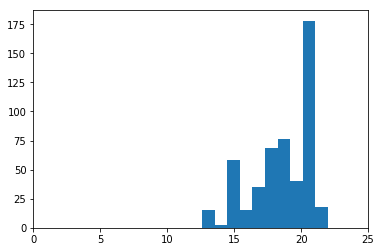

In [40]:
plt.hist(pt_data);
plt.xlim(0,25);

# PT-Ratio Vs CRIM

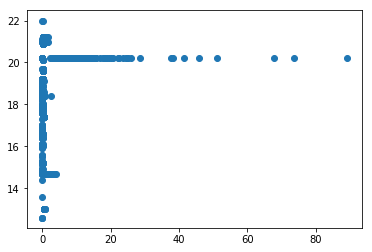

In [41]:
plt.scatter(crime_data, pt_data);

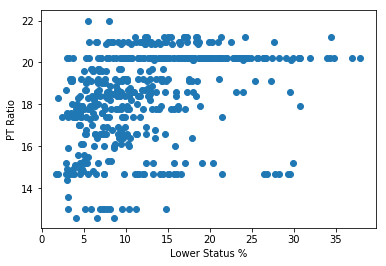

In [42]:
plt.scatter(lstat_data, pt_data);
plt.xlabel('Lower Status %');
plt.ylabel('PT Ratio');
    

In [43]:
np.corrcoef(pt_data, crime_data)

array([[1.        , 0.28994558],
       [0.28994558, 1.        ]])

In [44]:
np.corrcoef(pt_data, lstat_data)

array([[1.        , 0.37404432],
       [0.37404432, 1.        ]])

# Most indicative factors for the housing price

In [45]:
price_data = boston.target

In [47]:
np.corrcoef(price_data, crime_data)

array([[ 1.        , -0.38830461],
       [-0.38830461,  1.        ]])

In [61]:
coefs = []
for i, name in enumerate(feature_names):
    data = boston.data[:, i]
    c = np.corrcoef(price_data,data)[0,1]
    coefs.append((name,c))
coefs.sort(key=lambda x: x[1])

In [62]:
coefs

[('LSTAT', -0.7376627261740147),
 ('PTRATIO', -0.5077866855375615),
 ('INDUS', -0.48372516002837285),
 ('TAX', -0.4685359335677669),
 ('NOX', -0.4273207723732824),
 ('CRIM', -0.3883046085868113),
 ('RAD', -0.38162623063977746),
 ('AGE', -0.376954565004596),
 ('CHAS', 0.17526017719029818),
 ('DIS', 0.24992873408590388),
 ('B', 0.33346081965706637),
 ('ZN', 0.3604453424505433),
 ('RM', 0.695359947071539)]